# MANE 4333
## Homework 6 Solutions
## Dr. Timmer

In [1]:
# Python cell to read data from file into dataframe df
import pandas as pd
df=pd.read_csv('column_2C.DAT',delimiter=' ')
df.columns=['pIncidence','pTilt','llAngle','sSlope','pRadius','spon','classification']
df.head()

,pIncidence,pTilt,llAngle,sSlope,pRadius,spon,classification
0,39.06,10.06,25.02,29.00,114.41,4.56,AB
1,68.83,22.22,50.09,46.61,105.99,-3.53,AB
2,69.30,24.65,44.31,44.64,101.87,11.21,AB
3,49.71,9.65,28.32,40.06,108.17,7.92,AB
4,40.25,13.92,25.12,26.33,130.33,2.23,AB


Problem 1 Solution


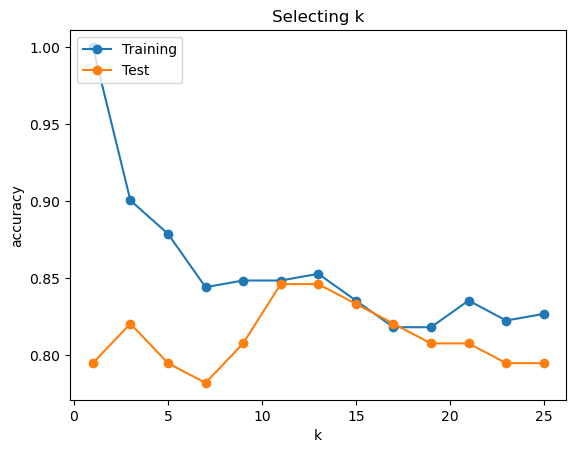

The optimal value of k for this seed is 11


In [13]:
# Problem 1 
'''
  Use the technique presented in Jupyter Example 2 to determine the 
  optimal value of *k* using KNeighborsClassifier. Prepare a plot and 
  add a print statement to the Problem 1 cell to state the optimal 
  value of *k*. Make sure to set a seed value so the results do not change.
 '''

print("Problem 1 Solution")
#preprocess data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn import neighbors


# create endogenous and exogenous variables
X = np.array(df.iloc[:, 0:6])
#print(X)
y = np.array(df['classification'])
#print(y)
# split and transform data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

# finding optimal k

ind=[]
test=[]
train=[]
for i in range(1,26,2):
    nn1=neighbors.KNeighborsClassifier(n_neighbors=i)
    nn1.fit(X_train_transformed,y_train)
    ind.append(i)
    train.append(nn1.score(X_train_transformed,y_train))
    test.append(nn1.score(X_test_transformed,y_test))
#print(train)
plt.plot(ind,train,marker='o',label='Training')
plt.plot(ind,test,marker='o',label='Test')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.title('Selecting k')
plt.show()

print("The optimal value of k for this seed is 11")

In [14]:
# Problem 2
'''
Implement a k-nearest neighbor classifier using the 
value of *k* founding in Problem 1. Print the training 
set and testing set accuracies.
'''

print("Problem 2 Solution")

#
nn2=neighbors.KNeighborsClassifier(n_neighbors=11)
nn2.fit(X_train_transformed,y_train)
print("training set accuracy is %f"%nn2.score(X_train_transformed,y_train))
print("testing set accuracy is %f"%nn2.score(X_test_transformed,y_test))

Problem 2 Solution
training set accuracy is 0.848485
testing set accuracy is 0.846154


Problem 3 Solution
[[47 10]
 [ 2 19]]
Confusion matrix, without normalization
[[47 10]
 [ 2 19]]
Normalized confusion matrix
[[0.82 0.18]
 [0.1  0.9 ]]


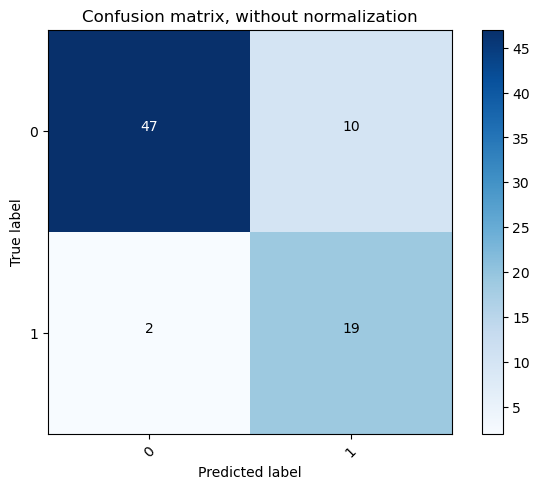

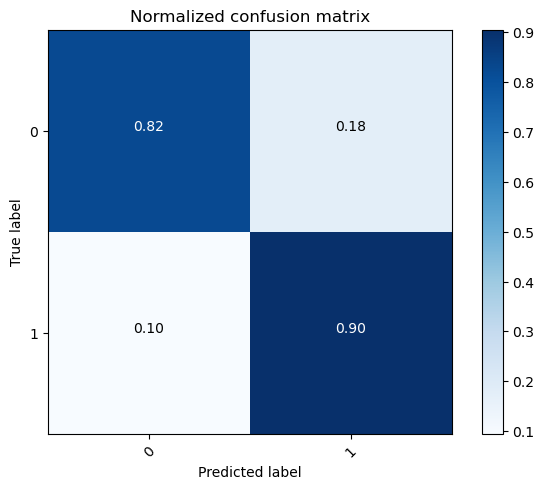

In [16]:
# Problem 3
'''
Calculate a text-based confusion matrix for the model trained 
in Problem 2. Also generate a normalized and non-normalized 
graphical confusion matrix for the model from Problem 2.
'''

print("Problem 3 Solution")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# text based answer
nn3=neighbors.KNeighborsClassifier(n_neighbors=11)
nn3.fit(X_train_transformed,y_train)
y_pred_test=nn3.predict(X_test_transformed)
cm=confusion_matrix(y_test,y_pred_test)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()
accuracy=(tn+tp)/(tn+fp+fn+tp)

# graphical confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names=['0','1']
cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [17]:
# Problem 4
'''
Use a six-fold cross-validation of the *k*-nearest neighbor 
classifier using the value of *k* found in Problem 2. 
Print the accuracy for the six different folds and 
the overall average of the six-fold cross-validation model.
'''

print("Problem 4 Solution")

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
clf = make_pipeline(preprocessing.MinMaxScaler(), neighbors.KNeighborsClassifier(n_neighbors=11))
scores=cross_val_score(clf, X, y, cv=5)
print(scores)
print(np.average(scores))

Problem 4 Solution
[0.52 0.82 0.87 0.87 0.79]
0.7735060814383925
